In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from deep_autoviml import deep_autoviml as deepauto
%matplotlib inline


Imported deep_auto_viml. version=0.0.26
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="auto",
		project_name="deep_autoviml", keras_options={}, model_options={}, 
		save_model_flag=True, use_my_model='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [3]:
df = pd.read_csv('train.csv')

In [8]:
df.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,36,4,0,0,34,6384,436.0,1806.0,144.0,129639,321300,280429,199452,True,2,965,126,285
1,36,17,1,1,178,6384,10314.0,1817.0,144.0,129639,129239,136127,199452,True,1,965,181,285
2,36,4,0,0,34,6384,0.0,1812.0,144.0,129639,321554,172725,199452,True,1,965,181,285
3,36,4,0,0,34,6384,10300.0,1815.0,144.0,129639,321300,136127,199452,True,1,965,181,285
4,19,0,3,0,3296,3370,0.0,1818.0,144.0,129408,355768,136127,360833,True,1,965,181,285


In [4]:
# Custom train test split

from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.33,random_state=42)
print(train.shape,test.shape)

(646, 18) (319, 18)


In [9]:
# We can change the parameters accordingly!

keras_model_type = "auto"
keras_options = {"early_stopping":True}
model_options = {'tuner':"storm","max_trails":50}
target = 'conversion_fraud'

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    early_stopping : True
Using following model_options given as input:
    tuner : storm

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
    Modified file names to fit no-space in column names rule in Tensorflow!
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 646 rows, 17 cols
Data Set columns info:
* clientid: 0 nulls, 50 unique vals, most common: {36: 362, 45: 29}
* pubclientid: 0 nulls, 38 unique vals, most common: {17: 138, 6: 116}
* clmbuserid: 0 nulls, 5 unique vals

    clientid : after integer hash encoding shape: 16
    pubclientid : after integer hash encoding shape: 12
    siteId : after integer hash encoding shape: 20
    goalid : after integer hash encoding shape: 16
    adslotdimid : after integer hash encoding shape: 45
    ispDimId : after integer hash encoding shape: 33
    clmbuserid : after integer categorical encoding shape: 30
    imprid : after integer categorical encoding shape: 18
    browserId : after integer categorical encoding shape: 54
    osVerDimId : after integer categorical encoding shape: 168
    Alert! excessive feature dimension created. Check if necessary to have this many.
    clickIp : after integer categorical encoding shape: 18
    itmClmbLId : after integer categorical encoding shape: 66
    devTypeDimId : after integer categorical encoding shape: 24
Time taken for preprocessing (in seconds) = 1
    All non-NLP features preprocessing completed.
Inferred column names, layers and types (double-check for duplicates 

25/25 [==============================] - 0s 15ms/step - loss: 0.3530 - balanced_sparse_categorical_accuracy: 0.9157 - val_loss: 0.7074 - val_balanced_sparse_categorical_accuracy: 0.8414

Learning rate for epoch 12 is 0.049027830362319946
Epoch 13/100
25/25 [==============================] - 0s 14ms/step - loss: 0.3417 - balanced_sparse_categorical_accuracy: 0.9296 - val_loss: 0.6335 - val_balanced_sparse_categorical_accuracy: 0.8606

Learning rate for epoch 13 is 0.04997281730175018
Epoch 14/100
25/25 [==============================] - 0s 18ms/step - loss: 0.3041 - balanced_sparse_categorical_accuracy: 0.9600 - val_loss: 0.4409 - val_balanced_sparse_categorical_accuracy: 0.8491

Learning rate for epoch 14 is 0.04990829527378082
Epoch 15/100
25/25 [==============================] - 0s 16ms/step - loss: 0.2378 - balanced_sparse_categorical_accuracy: 0.9451 - val_loss: 0.6365 - val_balanced_sparse_categorical_accuracy: 0.5000

Learning rate for epoch 15 is 0.049560997635126114
Epoch 16/10

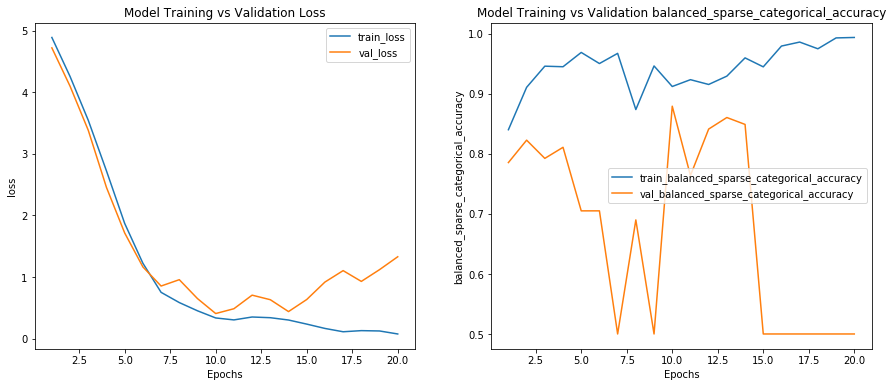

Time taken to train model (in mins) = 1
    Stopped epoch = 20
Held out data actuals shape: (64,)
Printing 10 samples from labels data:
tf.Tensor([ True False False False False  True False False False False], shape=(10,), dtype=bool)

Held out predictions shape:(64,)
    Sample predictions: [0 0 0 0 0 1 0 0 0 0]

###########################################################
         Held-out test data set Results:


Binary Class Model Metrics Report
#####################################################
    Accuracy          = 92.2%
    Balanced Accuracy = 88.1%
    Precision         = 75.0%
    Average Precision = 85.6%
    Recall            = 81.8%
    F1 Score          = 78.3%
    ROC AUC           = 94.9%
#####################################################

Training full train dataset. This will take time...
    best learning rate = 0.044158418
    set learning rate using best model: 0.044158418
    max epochs for training = 20

Saving model in test\auto now...this will take time...


     deep model saved in test\auto directory
106883

Saving vocab dictionary using pickle in test\cat_vocab_dict.pickle...will take time...
    Saved pickle file in test\cat_vocab_dict.pickle

Saving variable definitions file using pickle in test\var_df.pickle...will take time...
    Saved pickle file in test\var_df.pickle

Deep_Auto_ViML completed. Total time taken = 1 (in mins)
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
Model plot not saved due to error. Continuing...


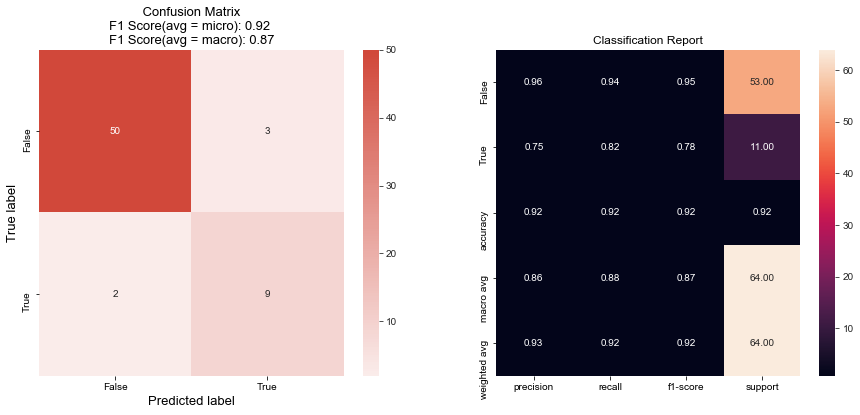

In [10]:
# Setting the parameter of "use_my_model" as my custom trained model

model,cat_vocab_dict = deepauto.fit(train,target,keras_model_type=keras_model_type,
                                    project_name = "test",
                                    keras_options = keras_options,
                                    model_options = model_options,
#                                     use_my_model=
                                    save_model_flag=True,
                                    verbose = 2)

In [13]:
test = df['conversion_fraud']
train = df.drop(['conversion_fraud'],axis = 1)

In [48]:
def getunique():
    
    for i in train.columns:
        print(f' Value counts for feature : {i} is : {train[i].unique()}')
        print("="*75)

In [49]:
getunique()

 Value counts for feature : clientid is : [36 19 45 39 55  1  8  0 43 50 52 28 21  7 15 42 30 54 18  4 20  6  9 46
 26 47 53 24 14 29 34 41 31 16 49 38 25 44 32 35 10 11 23 17 51 37 27 48
  5 12 22 13  3 56 33 40  2]
 Value counts for feature : pubclientid is : [ 4 17  0  1  6 41  5 29  2 19 24  9 38 20 15 14 12 25 35 18 33 13 28 23
 21 27 40 22 34 31  8  7 16 30 37 26 36  3 11 32 10 39]
 Value counts for feature : clmbuserid is : [0 1 3 2 4]
 Value counts for feature : imprid is : [0 1 2]
 Value counts for feature : siteId is : [  34  178 3296    4    3 3290   26 2612  767   39  245  549   74 1214
 3130 2627 1057 1219  825 1217   19  283   16  568  205 2958  379 2116
 2608 2923 1215  179   49  187  667 2602  494 1043 2604  535 2558 3192
 2607 2925 3291 2714 1028  204   85  621   66 2174 2901 2643 3129  432
   87 2930 1707 1135 2481 2585 2609 3118   15 3128   76 1034 2906   17
  495 2117 3149  220 2721  214   27]
 Value counts for feature : goalid is : [ 6384  3370  8628  7803 10679   

## From Scratch

In [51]:
df = pd.read_csv('train.csv')
df.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,36,4,0,0,34,6384,436.00,"1,806.00",144.00,129639,321300,280429,199452,True,2,965,126,285
1,36,17,1,1,178,6384,"10,314.00","1,817.00",144.00,129639,129239,136127,199452,True,1,965,181,285
2,36,4,0,0,34,6384,0.00,"1,812.00",144.00,129639,321554,172725,199452,True,1,965,181,285
3,36,4,0,0,34,6384,"10,300.00","1,815.00",144.00,129639,321300,136127,199452,True,1,965,181,285
4,19,0,3,0,3296,3370,0.00,"1,818.00",144.00,129408,355768,136127,360833,True,1,965,181,285


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['conversion_fraud'] = le.fit_transform(df['conversion_fraud'])
df.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,36,4,0,0,34,6384,436.00,"1,806.00",144.00,129639,321300,280429,199452,1,2,965,126,285
1,36,17,1,1,178,6384,"10,314.00","1,817.00",144.00,129639,129239,136127,199452,1,1,965,181,285
2,36,4,0,0,34,6384,0.00,"1,812.00",144.00,129639,321554,172725,199452,1,1,965,181,285
3,36,4,0,0,34,6384,"10,300.00","1,815.00",144.00,129639,321300,136127,199452,1,1,965,181,285
4,19,0,3,0,3296,3370,0.00,"1,818.00",144.00,129408,355768,136127,360833,1,1,965,181,285


In [53]:
test = df['conversion_fraud']
train = df.drop(['conversion_fraud'],axis = 1)
train.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,36,4,0,0,34,6384,436.00,"1,806.00",144.00,129639,321300,280429,199452,2,965,126,285
1,36,17,1,1,178,6384,"10,314.00","1,817.00",144.00,129639,129239,136127,199452,1,965,181,285
2,36,4,0,0,34,6384,0.00,"1,812.00",144.00,129639,321554,172725,199452,1,965,181,285
3,36,4,0,0,34,6384,"10,300.00","1,815.00",144.00,129639,321300,136127,199452,1,965,181,285
4,19,0,3,0,3296,3370,0.00,"1,818.00",144.00,129408,355768,136127,360833,1,965,181,285


In [133]:
import scipy.stats as stats
def plotboxcox(df,col):
    
      plt.figure(figsize = (16,9))
      plt.subplot(1,3,1)
      plt.hist(df[col],color = 'salmon')

      plt.subplot(1,3,2)
      stats.probplot(df[col],dist = 'norm',plot = plt)

      plt.subplot(1,3,3)
      sn.boxplot(df[col],color = 'red')

      plt.show()

In [134]:
boxcox_list = ['clientid','pubclientid','siteId',
               'goalid','adslotdimid','ispDimId','itmClmbLId']

temp = train.copy()
for i in boxcox_list:
    temp[i],params = stats.boxcox(temp[i]+1)
    
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,163.41,2.10,0,0,4.59,"23,373.89",436.00,"1,806.00",144.00,129639,"1,920,772,281,416,235.25","39,356.05",199452,2,965,19.56,285
1,163.41,4.72,1,1,7.58,"23,373.89","10,314.00","1,817.00",144.00,129639,"142,244,598,450,140.25","21,625.52",199452,1,965,23.68,285
2,163.41,2.10,0,0,4.59,"23,373.89",0.00,"1,812.00",144.00,129639,"1,925,115,392,152,066.50","26,341.59",199452,1,965,23.68,285
3,163.41,2.10,0,0,4.59,"23,373.89","10,300.00","1,815.00",144.00,129639,"1,920,772,281,416,235.25","21,625.52",199452,1,965,23.68,285
4,63.34,0.00,3,0,14.93,"11,101.29",0.00,"1,818.00",144.00,129408,"2,570,195,009,241,287.00","21,625.52",360833,1,965,23.68,285


 Distribution for clientid is shown ↓


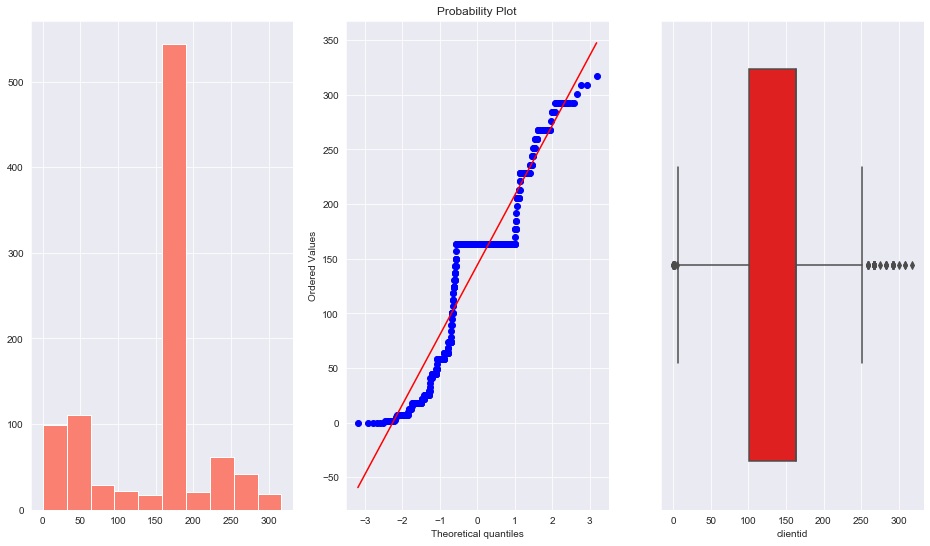

----------------------------------------------------------------------------------------------------
 Distribution for pubclientid is shown ↓


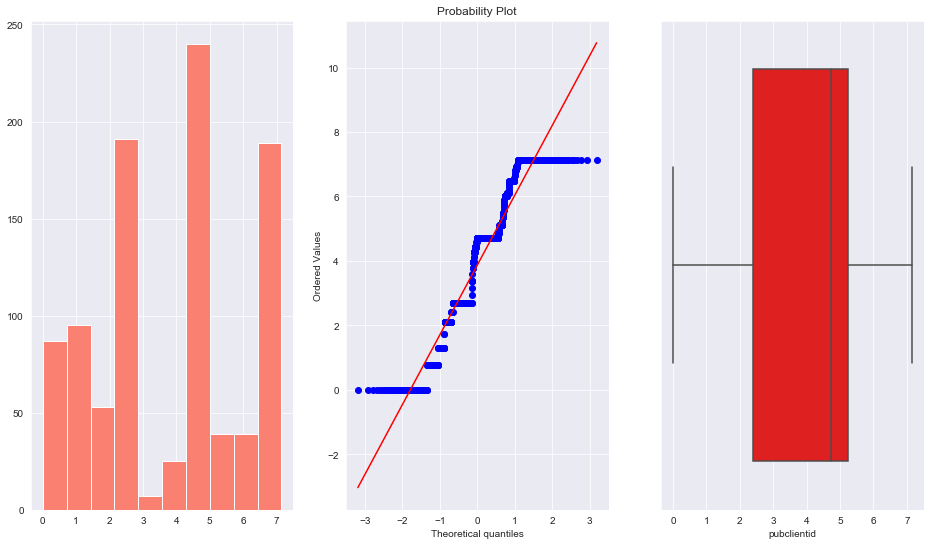

----------------------------------------------------------------------------------------------------
 Distribution for siteId is shown ↓


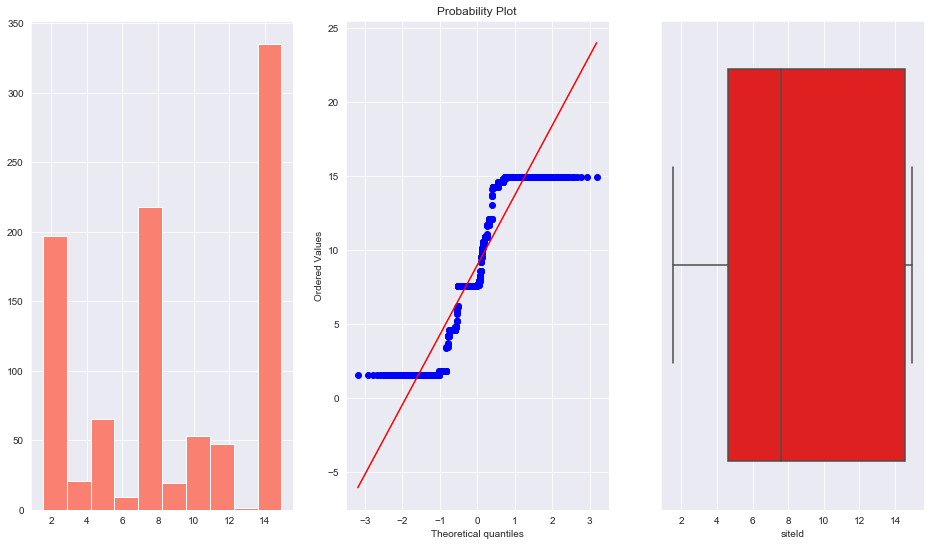

----------------------------------------------------------------------------------------------------
 Distribution for goalid is shown ↓


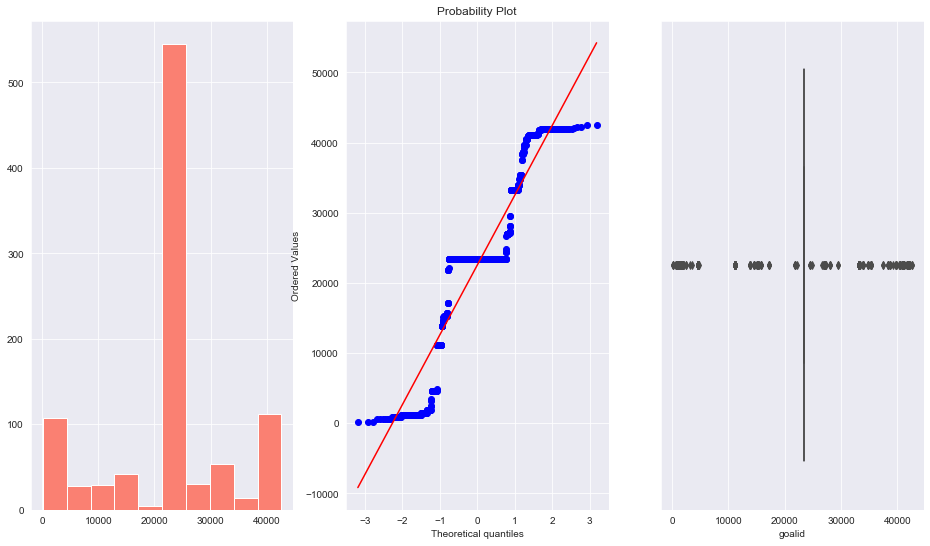

----------------------------------------------------------------------------------------------------
 Distribution for adslotdimid is shown ↓


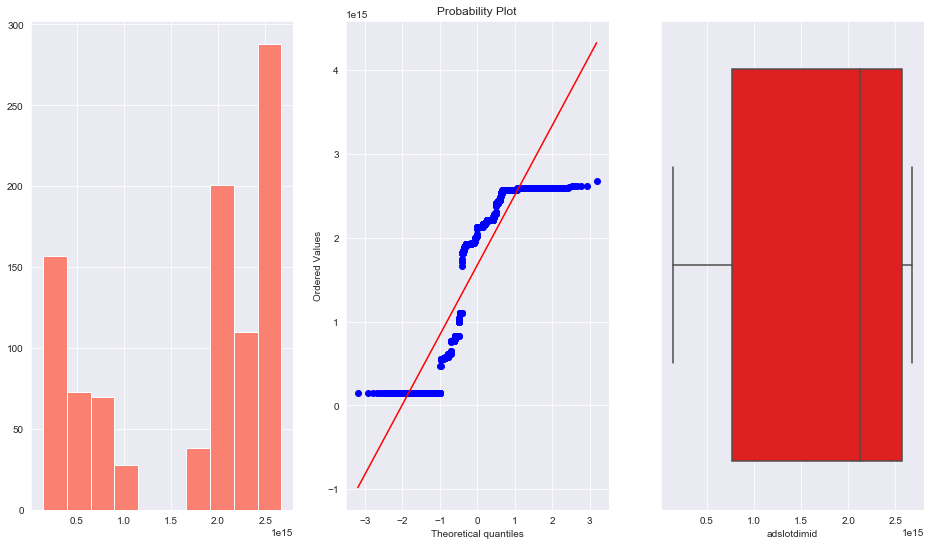

----------------------------------------------------------------------------------------------------
 Distribution for ispDimId is shown ↓


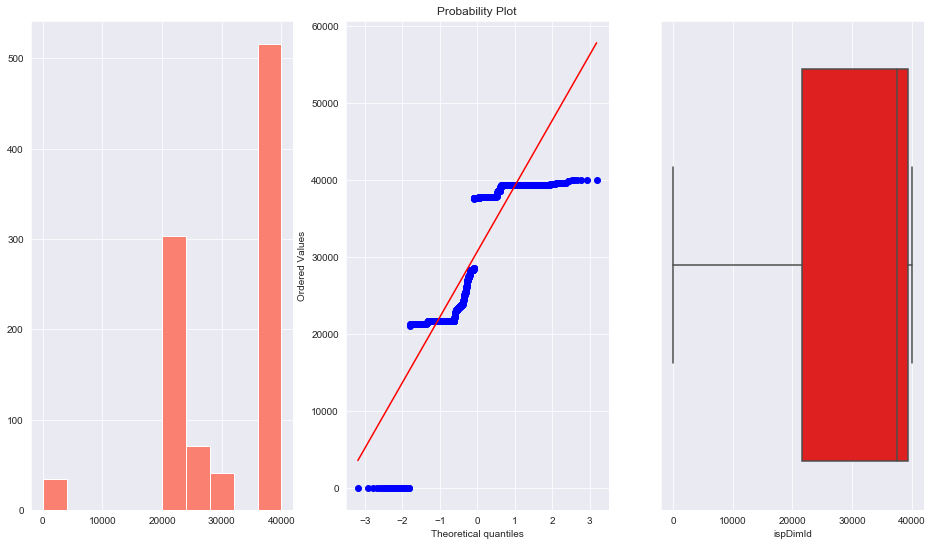

----------------------------------------------------------------------------------------------------
 Distribution for itmClmbLId is shown ↓


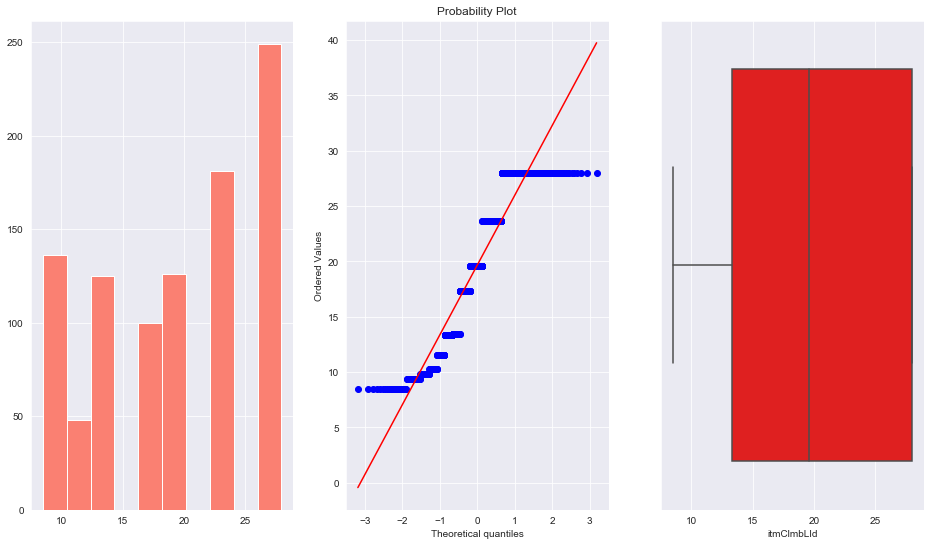

----------------------------------------------------------------------------------------------------


In [135]:
for i in boxcox_list:
    print(f' Distribution for {i} is shown ↓')
    plotboxcox(temp,i)
    print("-"*100)

In [136]:
# Removing outliers using IQR (Inter Quantile Range)

def quantile(df,val):
    a = []
    df_25 = df[val].quantile(0.25)
    df_75 = df[val].quantile(0.75)
    iqr = df_75-df_25
    upper_limit = float(df_75+(iqr*1.5))
    lower_limit = float(df_25-(iqr*1.5))
    
    for i in df[val]:
        if i>upper_limit:
            i = np.NaN
        
        elif i<lower_limit:
            i = np.NaN
            
        else:
            i = i
            
        a.append(i)
        
    return a

outlier_removal = ['clientid','pubclientid','siteId',
               'goalid','adslotdimid','ispDimId','itmClmbLId']

for i in outlier_removal:
    temp[i] = quantile(temp,i)
    

## Outliers

In [137]:
def fillnavalues(colname):
    temp[colname+'_mean'] = temp[colname].fillna(temp[colname].mean())
    temp[colname+'_median'] = temp[colname].fillna(temp[colname].median())
    temp[colname+'_mode'] = temp[colname].fillna(temp[colname].mode()[0])

In [138]:
def maps(df,col):
    
    plt.figure(figsize=(20,7))
    plt.subplot(1,3,1)
    sn.distplot(df[col],kde=True,hist=False,color='red',label=col)
    sn.distplot(df[col+'_mean'],kde=True,hist=False,color='black',label=col+'_mean')
    
    plt.subplot(1,3,2)
    sn.distplot(df[col],kde=True,hist=False,color='red',label=col)
    sn.distplot(df[col+'_median'],kde=True,hist=False,color='black',label=col+'_median')
    
    plt.subplot(1,3,3)
    sn.distplot(df[col],kde=True,hist=False,color='red',label=col)
    sn.distplot(df[col+'_mode'],kde=True,hist=False,color='black',label=col+'_mode')
    
    plt.show()
    

 
col_list = ['clientid','goalid']
for i in col_list:
    fillnavalues(i)

 Distribution analysis for col : clientid is shown ↓


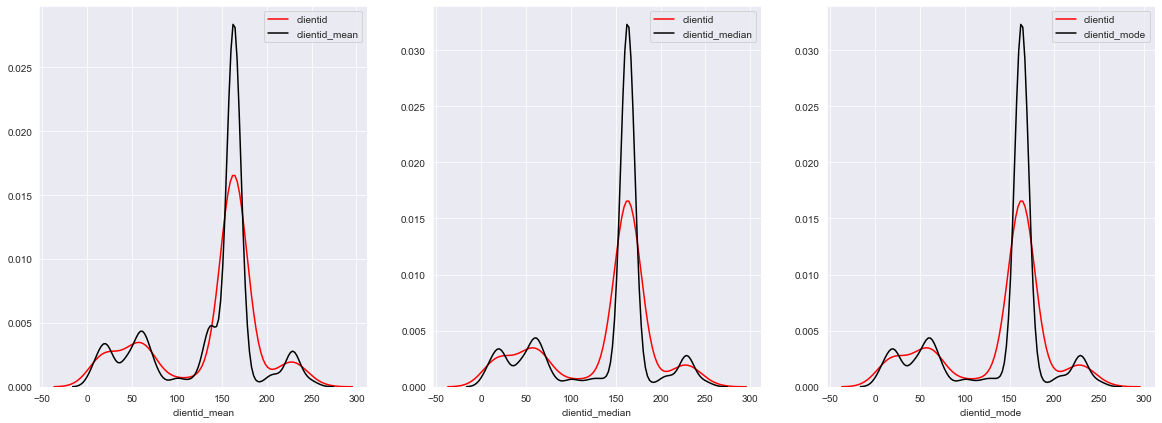

 Distribution analysis for col : goalid is shown ↓


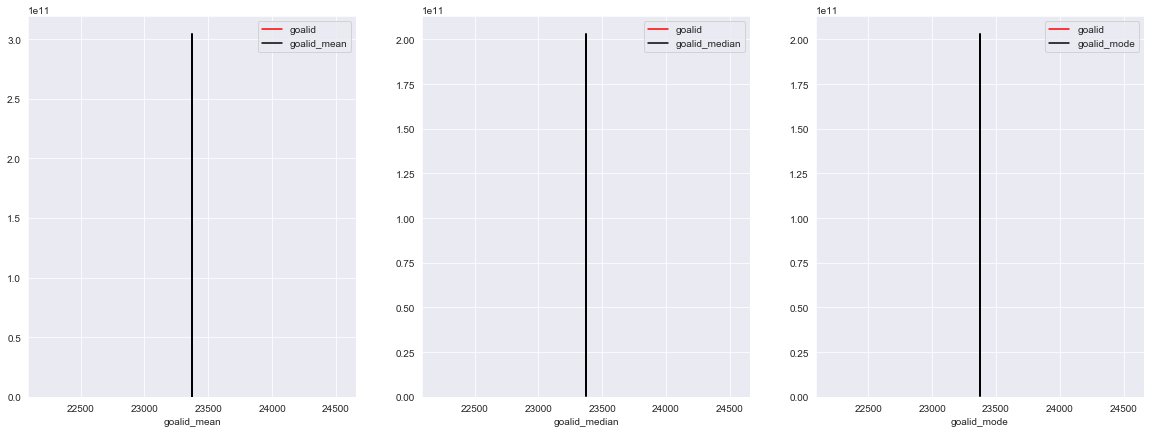

In [139]:
for i in col_list:
    print(f' Distribution analysis for col : {i} is shown ↓')
    maps(temp,i)
    print("="*100)
    
    

In [140]:
def minmax(df,col):
    
    ans = []
    dummy = df.copy()
    dummy['clientid'] = dummy['clientid'].fillna(0)
    values = [i for i in list(dummy['clientid'].values) if i!=0]
    maxi = max(values)
    mini = min(values)
    diff = maxi-mini
    for i in df[col].values:
        ans.append(maxi-i)
        
    ans = [i/diff for i in ans]
    return sum(ans)/len(ans)

In [141]:
print(minmax(temp,'clientid'))

nan


In [142]:
# Filling in maxi-mini
# one approach is (col.max-col.min)/col.mean

def fillmaxi(col):
    
    maximin = max(temp[col])-min(temp[col])
    meanval = temp[col].median()
    finalval = maximin/meanval
    temp[col+'min_max'] = temp[col].fillna(finalval)
    

    
col_list = ['clientid','goalid']
for i in col_list:
    fillmaxi(i)   

In [143]:
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId,clientid_mean,clientid_median,clientid_mode,goalid_mean,goalid_median,goalid_mode,clientidmin_max,goalidmin_max
0,163.41,2.10,0,0,4.59,"23,373.89",436.00,"1,806.00",144.00,129639,"1,920,772,281,416,235.25","39,356.05",199452,2,965,19.56,285,163.41,163.41,163.41,"23,373.89","23,373.89","23,373.89",163.41,"23,373.89"
1,163.41,4.72,1,1,7.58,"23,373.89","10,314.00","1,817.00",144.00,129639,"142,244,598,450,140.25","21,625.52",199452,1,965,23.68,285,163.41,163.41,163.41,"23,373.89","23,373.89","23,373.89",163.41,"23,373.89"
2,163.41,2.10,0,0,4.59,"23,373.89",0.00,"1,812.00",144.00,129639,"1,925,115,392,152,066.50","26,341.59",199452,1,965,23.68,285,163.41,163.41,163.41,"23,373.89","23,373.89","23,373.89",163.41,"23,373.89"
3,163.41,2.10,0,0,4.59,"23,373.89","10,300.00","1,815.00",144.00,129639,"1,920,772,281,416,235.25","21,625.52",199452,1,965,23.68,285,163.41,163.41,163.41,"23,373.89","23,373.89","23,373.89",163.41,"23,373.89"
4,63.34,0.00,3,0,14.93,NaN,0.00,"1,818.00",144.00,129408,"2,570,195,009,241,287.00","21,625.52",360833,1,965,23.68,285,63.34,63.34,63.34,"23,373.89","23,373.89","23,373.89",63.34,0.00


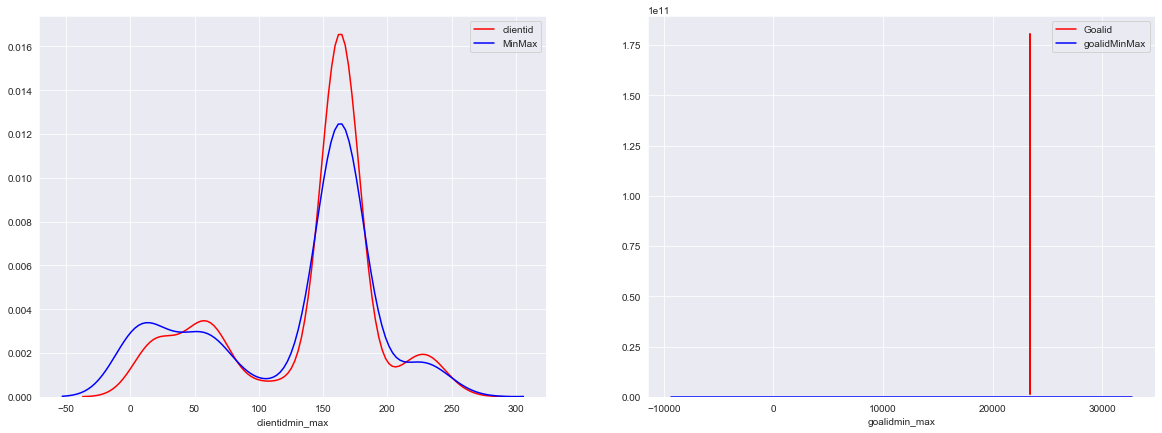

In [144]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sn.distplot(temp['clientid'],kde = True,hist = False,
           label = 'clientid',color = 'red')
sn.distplot(temp['clientidmin_max'],kde=True,
           hist=False,label='MinMax',color = 'blue')

plt.subplot(1,2,2)
sn.distplot(temp['goalid'],kde = True,hist=False,
           label='Goalid',color = 'red')
sn.distplot(temp['goalidmin_max'],kde=True,
           hist=False,label='goalidMinMax',color = 'blue')

plt.show()

In [145]:
temp['clientid'] = temp['clientid'].fillna(temp['clientid'].mean())
temp['goalid'] = temp['goalid'].fillna(temp['goalid'].mean())
temp.isnull().sum()

clientid             0
pubclientid          0
clmbuserid           0
imprid               0
siteId               0
goalid             429
cityId               0
stateId              0
countryDimId         0
browserId            0
adslotdimid          0
ispDimId             0
osVerDimId           0
clickIp              0
crtd                 0
itmClmbLId           0
devTypeDimId         0
clientid_mean        0
clientid_median      0
clientid_mode        0
goalid_mean          0
goalid_median        0
goalid_mode          0
clientidmin_max      0
goalidmin_max        0
dtype: int64

In [151]:
temp.columns

Index(['clientid', 'pubclientid', 'clmbuserid', 'imprid', 'siteId', 'goalid',
       'cityId', 'stateId', 'countryDimId', 'browserId', 'adslotdimid',
       'ispDimId', 'osVerDimId', 'clickIp', 'crtd', 'itmClmbLId',
       'devTypeDimId'],
      dtype='object')

In [152]:
temp = temp[['clientid', 'pubclientid', 'clmbuserid', 'imprid', 'siteId', 'goalid',
       'cityId', 'stateId', 'countryDimId', 'browserId', 'adslotdimid',
       'ispDimId', 'osVerDimId', 'clickIp', 'crtd', 'itmClmbLId',
       'devTypeDimId']]
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,163.41,2.10,0,0,4.59,"23,373.89",436.00,"1,806.00",144.00,129639,"1,920,772,281,416,235.25","39,356.05",199452,2,965,19.56,285
1,163.41,4.72,1,1,7.58,"23,373.89","10,314.00","1,817.00",144.00,129639,"142,244,598,450,140.25","21,625.52",199452,1,965,23.68,285
2,163.41,2.10,0,0,4.59,"23,373.89",0.00,"1,812.00",144.00,129639,"1,925,115,392,152,066.50","26,341.59",199452,1,965,23.68,285
3,163.41,2.10,0,0,4.59,"23,373.89","10,300.00","1,815.00",144.00,129639,"1,920,772,281,416,235.25","21,625.52",199452,1,965,23.68,285
4,63.34,0.00,3,0,14.93,"23,373.89",0.00,"1,818.00",144.00,129408,"2,570,195,009,241,287.00","21,625.52",360833,1,965,23.68,285


In [153]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier

In [154]:
mutual_info = mutual_info_classif(temp,test)
data = pd.DataFrame(mutual_info,index=temp.columns)
data.columns = ['Mutual_info']
data.sort_values(by = ['Mutual_info'],ascending = False).head(10).style.background_gradient('plasma')

,Mutual_info
itmClmbLId,0.179041
adslotdimid,0.159448
devTypeDimId,0.128154
siteId,0.126757
pubclientid,0.108905
clientid,0.052336
stateId,0.043008
clmbuserid,0.039374
imprid,0.034844
cityId,0.033679


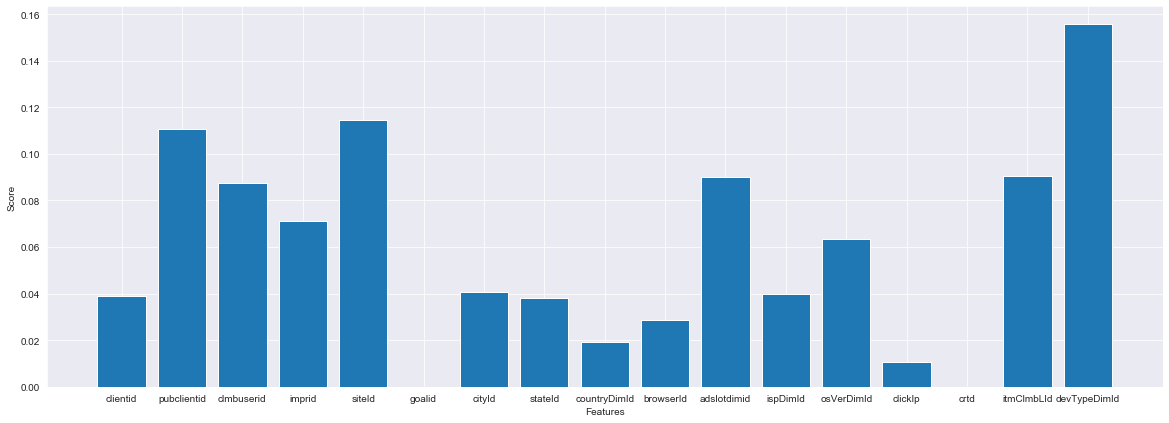

In [155]:
extratree = ExtraTreesClassifier()
extratree.fit(temp,test)
datadum = pd.DataFrame(extratree.feature_importances_,index = temp.columns,columns=['Important'])
datadum.sort_values(['Important'],ascending = False)
plt.figure(figsize=(20,7))
plt.bar(temp.columns,datadum['Important'],align='center')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()


In [156]:
top10mut = data.sort_values(by = ['Mutual_info'],ascending=False)
top10tree = datadum.sort_values(by = ['Important'],ascending=False)

top10 = top10mut.index[:10]
top10tree = top10tree.index[:10]

top10 = list(top10)
top10tree = list(top10tree)
touse = list(set(top10+top10tree))
print(touse)


['siteId', 'stateId', 'clientid', 'pubclientid', 'ispDimId', 'itmClmbLId', 'cityId', 'clmbuserid', 'adslotdimid', 'devTypeDimId', 'osVerDimId', 'imprid']


In [157]:
colstouse = []
for i in temp.columns:
    if i in touse:
        colstouse.append(i)
        
print(colstouse)

['clientid', 'pubclientid', 'clmbuserid', 'imprid', 'siteId', 'cityId', 'stateId', 'adslotdimid', 'ispDimId', 'osVerDimId', 'itmClmbLId', 'devTypeDimId']


In [158]:
temp = temp[['clientid', 'pubclientid', 'clmbuserid', 
             'imprid', 'siteId', 'cityId', 'stateId', 
             'adslotdimid', 'ispDimId', 'osVerDimId', 
             'itmClmbLId', 'devTypeDimId']
]
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,cityId,stateId,adslotdimid,ispDimId,osVerDimId,itmClmbLId,devTypeDimId
0,163.41,2.10,0,0,4.59,436.00,"1,806.00","1,920,772,281,416,235.25","39,356.05",199452,19.56,285
1,163.41,4.72,1,1,7.58,"10,314.00","1,817.00","142,244,598,450,140.25","21,625.52",199452,23.68,285
2,163.41,2.10,0,0,4.59,0.00,"1,812.00","1,925,115,392,152,066.50","26,341.59",199452,23.68,285
3,163.41,2.10,0,0,4.59,"10,300.00","1,815.00","1,920,772,281,416,235.25","21,625.52",199452,23.68,285
4,63.34,0.00,3,0,14.93,0.00,"1,818.00","2,570,195,009,241,287.00","21,625.52",360833,23.68,285


In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp,test,
                                                    test_size = 0.3)

print(X_train.shape,X_test.shape)    

(675, 12) (290, 12)


In [162]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler
mm = MinMaxScaler()
X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.fit_transform(X_test)

Recommended hidden layers (with units in each Dense Layer)  = (96, 64, 32)

In [163]:
len(train.columns)

17

In [212]:
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adamax,Adam
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import metrics
from sklearn import metrics

In [213]:
model = Sequential()

# First layer

model.add(Dense(96,input_dim= 12,activation = 'selu',
               kernel_initializer = 'lecun_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


# Layer1 sub added newly

model.add(Dense(96,input_dim= 12,activation = 'selu',
               kernel_initializer = 'lecun_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.1))




# Second Layer


model.add(Dense(64,activation = 'selu',
               kernel_initializer = 'lecun_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.1))



# Second Layer Sub



model.add(Dense(64,activation = 'selu',
               kernel_initializer = 'lecun_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.1))


# Third Layer

model.add(Dense(32,activation = 'selu',
               kernel_initializer = 'lecun_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.1))



# Final Layer
model.add(Dense(2,activation = 'softmax'))



# Compiling the Model

model.compile(optimizer =Adamax(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 96)                1248      
_________________________________________________________________
batch_normalization_21 (Batc (None, 96)                384       
_________________________________________________________________
dropout_21 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 96)                9312      
_________________________________________________________________
batch_normalization_22 (Batc (None, 96)                384       
_________________________________________________________________
dropout_22 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)               

In [214]:
history = model.fit(X_train_scaled,y_train,batch_size=60,
         epochs=1000,validation_data=(X_test_scaled,y_test))

Epoch 1/1000
12/12 [==============================] - 3s 51ms/step - loss: 0.7499 - accuracy: 0.5867 - val_loss: 0.3963 - val_accuracy: 0.9069
Epoch 2/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.6482 - accuracy: 0.6726 - val_loss: 0.3592 - val_accuracy: 0.8862
Epoch 3/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.6030 - accuracy: 0.6844 - val_loss: 0.3873 - val_accuracy: 0.9310
Epoch 4/1000
12/12 [==============================] - 0s 17ms/step - loss: 0.5598 - accuracy: 0.7363 - val_loss: 0.4160 - val_accuracy: 0.9379
Epoch 5/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.5353 - accuracy: 0.7378 - val_loss: 0.3951 - val_accuracy: 0.9414
Epoch 6/1000
12/12 [==============================] - 0s 16ms/step - loss: 0.5099 - accuracy: 0.7778 - val_loss: 0.3988 - val_accuracy: 0.9345
Epoch 7/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.4746 - accuracy: 0.7941 - val_loss: 0.3831 - val_accuracy: 0.9483

Epoch 58/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.2169 - accuracy: 0.9170 - val_loss: 0.1307 - val_accuracy: 0.9621
Epoch 59/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.2197 - accuracy: 0.9067 - val_loss: 0.1262 - val_accuracy: 0.9621
Epoch 60/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.2193 - accuracy: 0.9244 - val_loss: 0.1234 - val_accuracy: 0.9655
Epoch 61/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.2086 - accuracy: 0.9230 - val_loss: 0.1236 - val_accuracy: 0.9655
Epoch 62/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1914 - accuracy: 0.9274 - val_loss: 0.1195 - val_accuracy: 0.9586
Epoch 63/1000
12/12 [==============================] - 0s 14ms/step - loss: 0.2034 - accuracy: 0.9244 - val_loss: 0.1212 - val_accuracy: 0.9586
Epoch 64/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.2047 - accuracy: 0.9156 - val_loss: 0.1218 - val_accuracy:

12/12 [==============================] - 0s 13ms/step - loss: 0.1472 - accuracy: 0.9467 - val_loss: 0.1044 - val_accuracy: 0.9724
Epoch 115/1000
12/12 [==============================] - 0s 14ms/step - loss: 0.1437 - accuracy: 0.9407 - val_loss: 0.1016 - val_accuracy: 0.9724
Epoch 116/1000
12/12 [==============================] - 0s 20ms/step - loss: 0.1607 - accuracy: 0.9304 - val_loss: 0.1022 - val_accuracy: 0.9724
Epoch 117/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1756 - accuracy: 0.9348 - val_loss: 0.1025 - val_accuracy: 0.9724
Epoch 118/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1695 - accuracy: 0.9348 - val_loss: 0.1050 - val_accuracy: 0.9690
Epoch 119/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1614 - accuracy: 0.9437 - val_loss: 0.1041 - val_accuracy: 0.9690
Epoch 120/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.1642 - accuracy: 0.9378 - val_loss: 0.1073 - val_accuracy: 0.9655


12/12 [==============================] - 0s 12ms/step - loss: 0.1535 - accuracy: 0.9319 - val_loss: 0.1014 - val_accuracy: 0.9586
Epoch 171/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1601 - accuracy: 0.9348 - val_loss: 0.1049 - val_accuracy: 0.9586
Epoch 172/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.1453 - accuracy: 0.9496 - val_loss: 0.1047 - val_accuracy: 0.9621
Epoch 173/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1499 - accuracy: 0.9407 - val_loss: 0.1029 - val_accuracy: 0.9655
Epoch 174/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1447 - accuracy: 0.9422 - val_loss: 0.1027 - val_accuracy: 0.9621
Epoch 175/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.1449 - accuracy: 0.9452 - val_loss: 0.1028 - val_accuracy: 0.9586
Epoch 176/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1417 - accuracy: 0.9452 - val_loss: 0.1035 - val_accuracy: 0.9586


12/12 [==============================] - 0s 12ms/step - loss: 0.1310 - accuracy: 0.9511 - val_loss: 0.0984 - val_accuracy: 0.9690
Epoch 227/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1535 - accuracy: 0.9319 - val_loss: 0.0969 - val_accuracy: 0.9690
Epoch 228/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1328 - accuracy: 0.9467 - val_loss: 0.0981 - val_accuracy: 0.9655
Epoch 229/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1515 - accuracy: 0.9422 - val_loss: 0.0978 - val_accuracy: 0.9655
Epoch 230/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1435 - accuracy: 0.9407 - val_loss: 0.0993 - val_accuracy: 0.9655
Epoch 231/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1290 - accuracy: 0.9511 - val_loss: 0.1016 - val_accuracy: 0.9690
Epoch 232/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.1220 - accuracy: 0.9511 - val_loss: 0.0999 - val_accuracy: 0.9655


12/12 [==============================] - 0s 12ms/step - loss: 0.1245 - accuracy: 0.9511 - val_loss: 0.1030 - val_accuracy: 0.9655
Epoch 283/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1199 - accuracy: 0.9556 - val_loss: 0.1035 - val_accuracy: 0.9690
Epoch 284/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1345 - accuracy: 0.9541 - val_loss: 0.1027 - val_accuracy: 0.9690
Epoch 285/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1379 - accuracy: 0.9407 - val_loss: 0.1004 - val_accuracy: 0.9690
Epoch 286/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1293 - accuracy: 0.9452 - val_loss: 0.1016 - val_accuracy: 0.9655
Epoch 287/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1093 - accuracy: 0.9556 - val_loss: 0.1003 - val_accuracy: 0.9655
Epoch 288/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.1173 - accuracy: 0.9526 - val_loss: 0.1005 - val_accuracy: 0.9724
E

12/12 [==============================] - 0s 13ms/step - loss: 0.1091 - accuracy: 0.9600 - val_loss: 0.1034 - val_accuracy: 0.9552
Epoch 339/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1132 - accuracy: 0.9541 - val_loss: 0.1034 - val_accuracy: 0.9586
Epoch 340/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.1304 - accuracy: 0.9467 - val_loss: 0.1022 - val_accuracy: 0.9552
Epoch 341/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.1191 - accuracy: 0.9511 - val_loss: 0.1024 - val_accuracy: 0.9586
Epoch 342/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1289 - accuracy: 0.9407 - val_loss: 0.1028 - val_accuracy: 0.9552
Epoch 343/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1273 - accuracy: 0.9467 - val_loss: 0.1058 - val_accuracy: 0.9586
Epoch 344/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1026 - accuracy: 0.9674 - val_loss: 0.1074 - val_accuracy: 0.9621


12/12 [==============================] - 0s 14ms/step - loss: 0.1186 - accuracy: 0.9511 - val_loss: 0.1037 - val_accuracy: 0.9552
Epoch 395/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.0952 - accuracy: 0.9585 - val_loss: 0.1041 - val_accuracy: 0.9621
Epoch 396/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.1219 - accuracy: 0.9467 - val_loss: 0.1052 - val_accuracy: 0.9655
Epoch 397/1000
12/12 [==============================] - 0s 14ms/step - loss: 0.1138 - accuracy: 0.9570 - val_loss: 0.1053 - val_accuracy: 0.9655
Epoch 398/1000
12/12 [==============================] - 0s 16ms/step - loss: 0.1161 - accuracy: 0.9541 - val_loss: 0.1057 - val_accuracy: 0.9655
Epoch 399/1000
12/12 [==============================] - 0s 14ms/step - loss: 0.1324 - accuracy: 0.9452 - val_loss: 0.1047 - val_accuracy: 0.9655
Epoch 400/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.1143 - accuracy: 0.9556 - val_loss: 0.1052 - val_accuracy: 0.9655


12/12 [==============================] - 0s 10ms/step - loss: 0.1012 - accuracy: 0.9570 - val_loss: 0.1067 - val_accuracy: 0.9655
Epoch 451/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.1344 - accuracy: 0.9511 - val_loss: 0.1054 - val_accuracy: 0.9655
Epoch 452/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.1104 - accuracy: 0.9600 - val_loss: 0.1057 - val_accuracy: 0.9655
Epoch 453/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1203 - accuracy: 0.9437 - val_loss: 0.1035 - val_accuracy: 0.9621
Epoch 454/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1146 - accuracy: 0.9526 - val_loss: 0.1025 - val_accuracy: 0.9655
Epoch 455/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1153 - accuracy: 0.9585 - val_loss: 0.1019 - val_accuracy: 0.9655
Epoch 456/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1041 - accuracy: 0.9481 - val_loss: 0.1036 - val_accuracy: 0.9655


12/12 [==============================] - 0s 15ms/step - loss: 0.1077 - accuracy: 0.9615 - val_loss: 0.1128 - val_accuracy: 0.9621
Epoch 507/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.1184 - accuracy: 0.9541 - val_loss: 0.1127 - val_accuracy: 0.9621
Epoch 508/1000
12/12 [==============================] - 0s 14ms/step - loss: 0.1178 - accuracy: 0.9526 - val_loss: 0.1092 - val_accuracy: 0.9586
Epoch 509/1000
12/12 [==============================] - 0s 14ms/step - loss: 0.1088 - accuracy: 0.9556 - val_loss: 0.1099 - val_accuracy: 0.9517
Epoch 510/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.1058 - accuracy: 0.9600 - val_loss: 0.1087 - val_accuracy: 0.9552
Epoch 511/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.1159 - accuracy: 0.9556 - val_loss: 0.1109 - val_accuracy: 0.9552
Epoch 512/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1135 - accuracy: 0.9496 - val_loss: 0.1118 - val_accuracy: 0.9586


12/12 [==============================] - 0s 11ms/step - loss: 0.1007 - accuracy: 0.9541 - val_loss: 0.1113 - val_accuracy: 0.9586
Epoch 563/1000
12/12 [==============================] - 0s 14ms/step - loss: 0.0914 - accuracy: 0.9644 - val_loss: 0.1116 - val_accuracy: 0.9586
Epoch 564/1000
12/12 [==============================] - 0s 14ms/step - loss: 0.1126 - accuracy: 0.9570 - val_loss: 0.1133 - val_accuracy: 0.9586
Epoch 565/1000
12/12 [==============================] - 0s 14ms/step - loss: 0.1082 - accuracy: 0.9526 - val_loss: 0.1126 - val_accuracy: 0.9586
Epoch 566/1000
12/12 [==============================] - 0s 14ms/step - loss: 0.1036 - accuracy: 0.9600 - val_loss: 0.1144 - val_accuracy: 0.9621
Epoch 567/1000
12/12 [==============================] - 0s 14ms/step - loss: 0.0858 - accuracy: 0.9719 - val_loss: 0.1137 - val_accuracy: 0.9586
Epoch 568/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1099 - accuracy: 0.9600 - val_loss: 0.1130 - val_accuracy: 0.9586


12/12 [==============================] - 0s 14ms/step - loss: 0.1051 - accuracy: 0.9600 - val_loss: 0.1064 - val_accuracy: 0.9655
Epoch 619/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.1032 - accuracy: 0.9585 - val_loss: 0.1088 - val_accuracy: 0.9655
Epoch 620/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.0980 - accuracy: 0.9585 - val_loss: 0.1092 - val_accuracy: 0.9621
Epoch 621/1000
12/12 [==============================] - 0s 18ms/step - loss: 0.0812 - accuracy: 0.9674 - val_loss: 0.1105 - val_accuracy: 0.9586
Epoch 622/1000
12/12 [==============================] - 0s 17ms/step - loss: 0.1136 - accuracy: 0.9452 - val_loss: 0.1120 - val_accuracy: 0.9586
Epoch 623/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0962 - accuracy: 0.9615 - val_loss: 0.1142 - val_accuracy: 0.9586
Epoch 624/1000
12/12 [==============================] - 0s 14ms/step - loss: 0.1070 - accuracy: 0.9541 - val_loss: 0.1150 - val_accuracy: 0.9552


12/12 [==============================] - 0s 24ms/step - loss: 0.0819 - accuracy: 0.9674 - val_loss: 0.1189 - val_accuracy: 0.9517
Epoch 675/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1035 - accuracy: 0.9585 - val_loss: 0.1206 - val_accuracy: 0.9517
Epoch 676/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.1001 - accuracy: 0.9600 - val_loss: 0.1260 - val_accuracy: 0.9517
Epoch 677/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.1042 - accuracy: 0.9585 - val_loss: 0.1264 - val_accuracy: 0.9517
Epoch 678/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0965 - accuracy: 0.9600 - val_loss: 0.1297 - val_accuracy: 0.9517
Epoch 679/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.0847 - accuracy: 0.9644 - val_loss: 0.1252 - val_accuracy: 0.9517
Epoch 680/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.1146 - accuracy: 0.9630 - val_loss: 0.1218 - val_accuracy: 0.9552


12/12 [==============================] - 0s 12ms/step - loss: 0.1122 - accuracy: 0.9496 - val_loss: 0.1196 - val_accuracy: 0.9517
Epoch 731/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.0977 - accuracy: 0.9630 - val_loss: 0.1200 - val_accuracy: 0.9517
Epoch 732/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.0935 - accuracy: 0.9615 - val_loss: 0.1211 - val_accuracy: 0.9517
Epoch 733/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0995 - accuracy: 0.9585 - val_loss: 0.1227 - val_accuracy: 0.9517
Epoch 734/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1072 - accuracy: 0.9556 - val_loss: 0.1213 - val_accuracy: 0.9517
Epoch 735/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0892 - accuracy: 0.9689 - val_loss: 0.1220 - val_accuracy: 0.9517
Epoch 736/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0900 - accuracy: 0.9689 - val_loss: 0.1261 - val_accuracy: 0.9586


12/12 [==============================] - 0s 12ms/step - loss: 0.0907 - accuracy: 0.9630 - val_loss: 0.1322 - val_accuracy: 0.9517
Epoch 787/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0778 - accuracy: 0.9704 - val_loss: 0.1317 - val_accuracy: 0.9517
Epoch 788/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1156 - accuracy: 0.9511 - val_loss: 0.1291 - val_accuracy: 0.9552
Epoch 789/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0889 - accuracy: 0.9585 - val_loss: 0.1310 - val_accuracy: 0.9552
Epoch 790/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0868 - accuracy: 0.9733 - val_loss: 0.1322 - val_accuracy: 0.9552
Epoch 791/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.0886 - accuracy: 0.9615 - val_loss: 0.1318 - val_accuracy: 0.9552
Epoch 792/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1057 - accuracy: 0.9541 - val_loss: 0.1285 - val_accuracy: 0.9552


12/12 [==============================] - 0s 12ms/step - loss: 0.1084 - accuracy: 0.9496 - val_loss: 0.1207 - val_accuracy: 0.9517
Epoch 843/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.1028 - accuracy: 0.9585 - val_loss: 0.1221 - val_accuracy: 0.9552
Epoch 844/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1023 - accuracy: 0.9659 - val_loss: 0.1233 - val_accuracy: 0.9552
Epoch 845/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0924 - accuracy: 0.9600 - val_loss: 0.1236 - val_accuracy: 0.9552
Epoch 846/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0975 - accuracy: 0.9585 - val_loss: 0.1219 - val_accuracy: 0.9552
Epoch 847/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1061 - accuracy: 0.9630 - val_loss: 0.1214 - val_accuracy: 0.9552
Epoch 848/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.0903 - accuracy: 0.9615 - val_loss: 0.1249 - val_accuracy: 0.9552


12/12 [==============================] - 0s 10ms/step - loss: 0.1075 - accuracy: 0.9541 - val_loss: 0.1261 - val_accuracy: 0.9552
Epoch 899/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.0766 - accuracy: 0.9689 - val_loss: 0.1277 - val_accuracy: 0.9552
Epoch 900/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.0877 - accuracy: 0.9659 - val_loss: 0.1251 - val_accuracy: 0.9552
Epoch 901/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0942 - accuracy: 0.9615 - val_loss: 0.1236 - val_accuracy: 0.9552
Epoch 902/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0873 - accuracy: 0.9570 - val_loss: 0.1247 - val_accuracy: 0.9586
Epoch 903/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0994 - accuracy: 0.9630 - val_loss: 0.1249 - val_accuracy: 0.9586
Epoch 904/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0875 - accuracy: 0.9689 - val_loss: 0.1264 - val_accuracy: 0.9586


12/12 [==============================] - 0s 12ms/step - loss: 0.1081 - accuracy: 0.9556 - val_loss: 0.1264 - val_accuracy: 0.9586
Epoch 955/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0829 - accuracy: 0.9674 - val_loss: 0.1262 - val_accuracy: 0.9586
Epoch 956/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0871 - accuracy: 0.9659 - val_loss: 0.1266 - val_accuracy: 0.9586
Epoch 957/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0852 - accuracy: 0.9644 - val_loss: 0.1286 - val_accuracy: 0.9586
Epoch 958/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0812 - accuracy: 0.9644 - val_loss: 0.1313 - val_accuracy: 0.9586
Epoch 959/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0829 - accuracy: 0.9704 - val_loss: 0.1331 - val_accuracy: 0.9586
Epoch 960/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0863 - accuracy: 0.9674 - val_loss: 0.1322 - val_accuracy: 0.9586


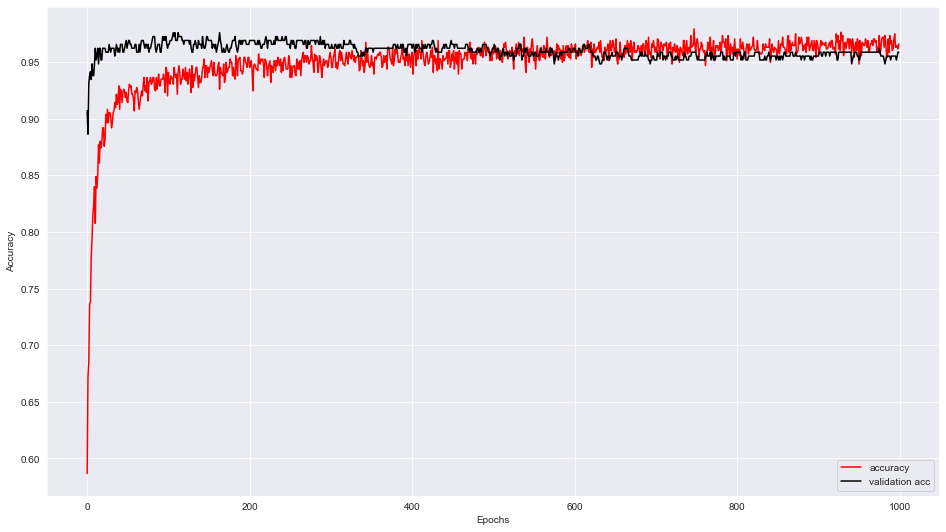

In [244]:
plt.figure(figsize=(16,9))
plt.plot(history.history['accuracy'],label = 'accuracy',
        color = 'red')
plt.plot(history.history['val_accuracy'],label = 'validation acc',
        color = 'black')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

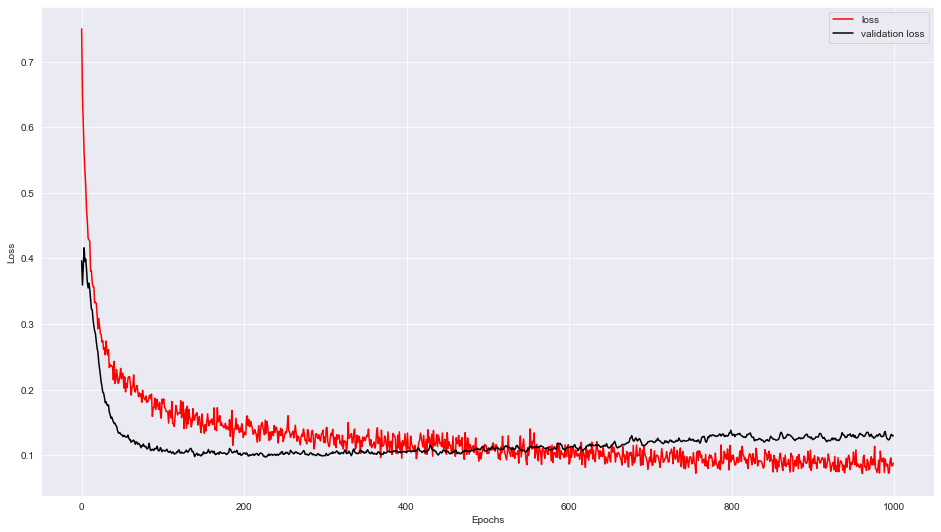

In [245]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'],label = 'loss',
        color = 'red')
plt.plot(history.history['val_loss'],label = 'validation loss',
        color = 'black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

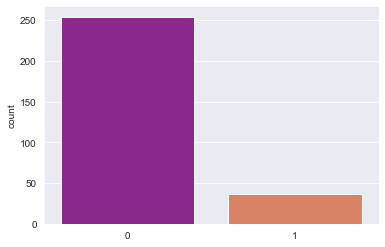

In [246]:
predictions = model.predict_classes(X_test_scaled)
sn.countplot(predictions,palette='plasma')

### Loading the test dataset and checking

In [247]:
test = pd.read_csv('test.csv')
test.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,33,8,0,0,3,8628,0,2442,145,0,233531,265618,0,2,455,126,274
1,27,38,1,0,3290,6384,10278,1808,144,129639,356952,280429,199414,1,455,181,274
2,27,38,1,0,3290,6384,10278,1808,144,129639,356952,280429,199414,1,455,181,274
3,15,0,2,0,3296,3370,10239,1801,144,129408,355768,280429,360833,1,455,181,274
4,15,0,2,0,3296,3370,10239,1801,144,129408,355768,280429,360833,1,455,181,274


In [248]:
test.shape

(455, 17)

In [249]:
boxcox_list = ['clientid','pubclientid','siteId',
               'goalid','adslotdimid','ispDimId','itmClmbLId']

temp = test.copy()
for i in boxcox_list:
    temp[i],params = stats.boxcox(temp[i]+1)
    
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,153.49,4.39,0,0,1.54,"31,681.63",0,2442,145,0,"41,637,661,881,659.18","35,146.19",0,2,455,116.56,274
1,113.35,12.45,1,0,15.46,"22,340.41",10278,1808,144,129639,"126,268,044,827,966.45","36,750.17",199414,1,455,166.27,274
2,113.35,12.45,1,0,15.46,"22,340.41",10278,1808,144,129639,"126,268,044,827,966.45","36,750.17",199414,1,455,166.27,274
3,47.14,0.00,2,0,15.46,"10,649.28",10239,1801,144,129408,"125,175,846,486,745.95","36,750.17",360833,1,455,166.27,274
4,47.14,0.00,2,0,15.46,"10,649.28",10239,1801,144,129408,"125,175,846,486,745.95","36,750.17",360833,1,455,166.27,274


 Distribution for clientid is shown ↓


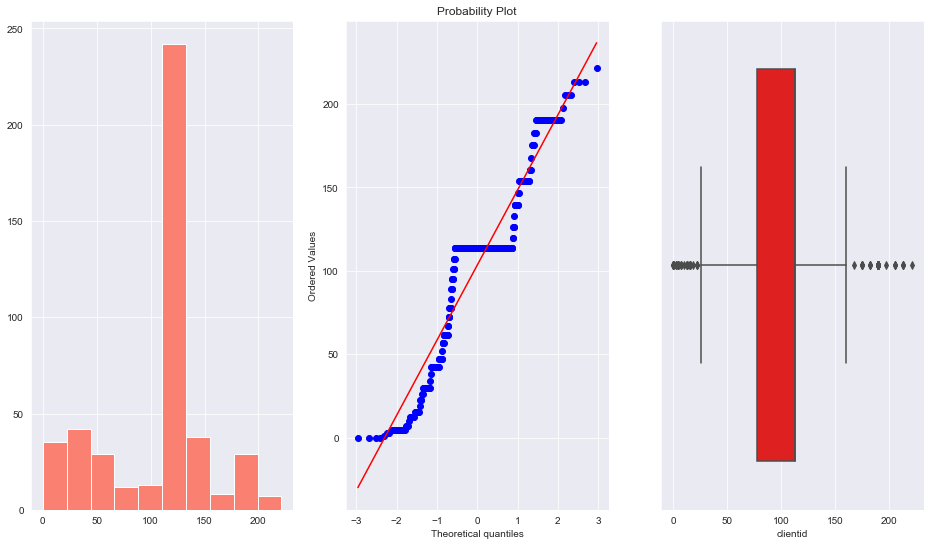

----------------------------------------------------------------------------------------------------
 Distribution for pubclientid is shown ↓


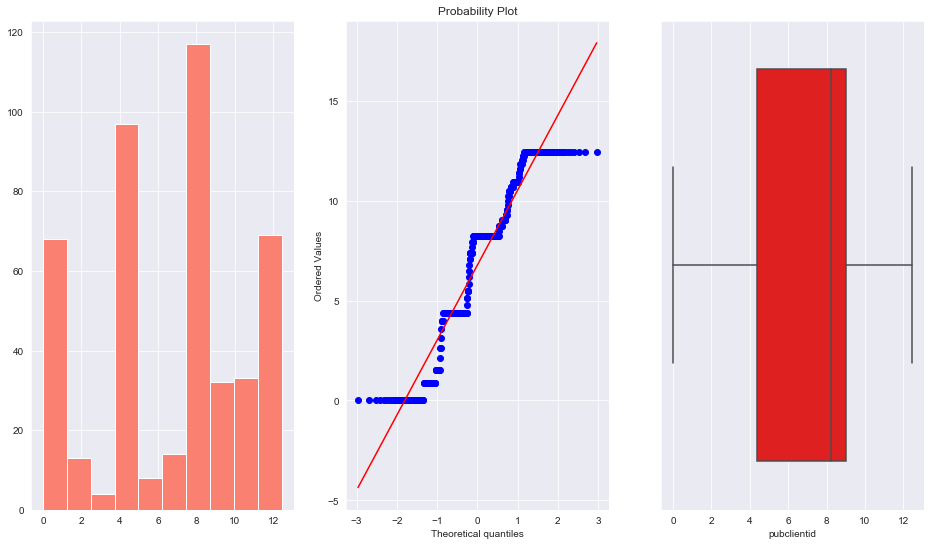

----------------------------------------------------------------------------------------------------
 Distribution for siteId is shown ↓


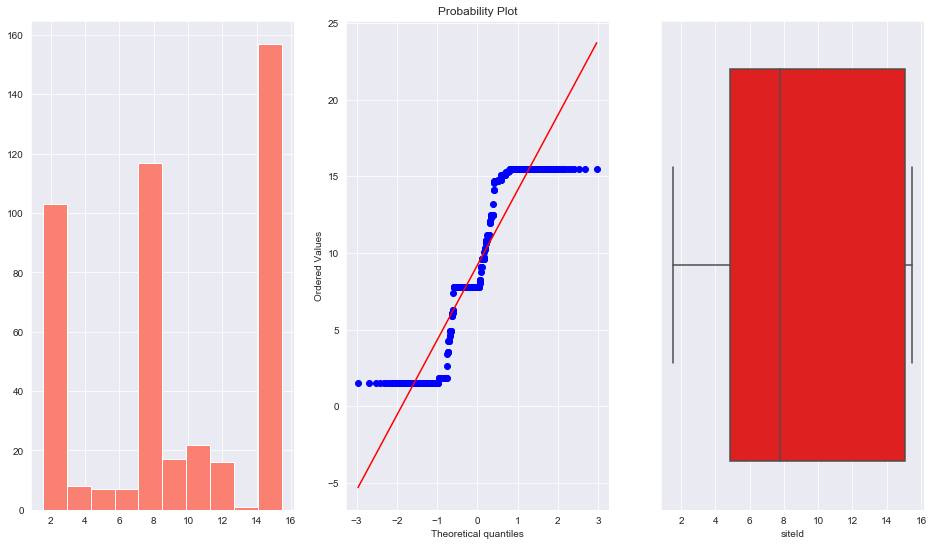

----------------------------------------------------------------------------------------------------
 Distribution for goalid is shown ↓


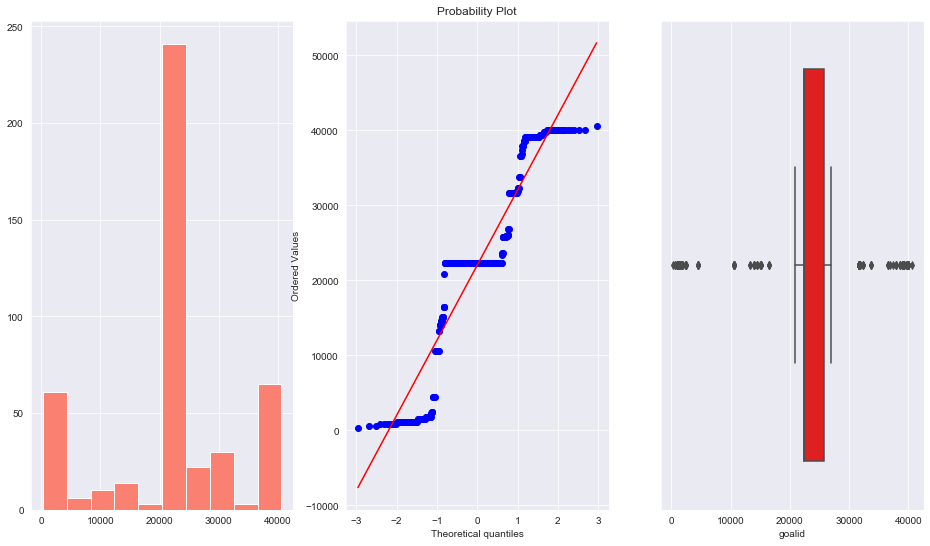

----------------------------------------------------------------------------------------------------
 Distribution for adslotdimid is shown ↓


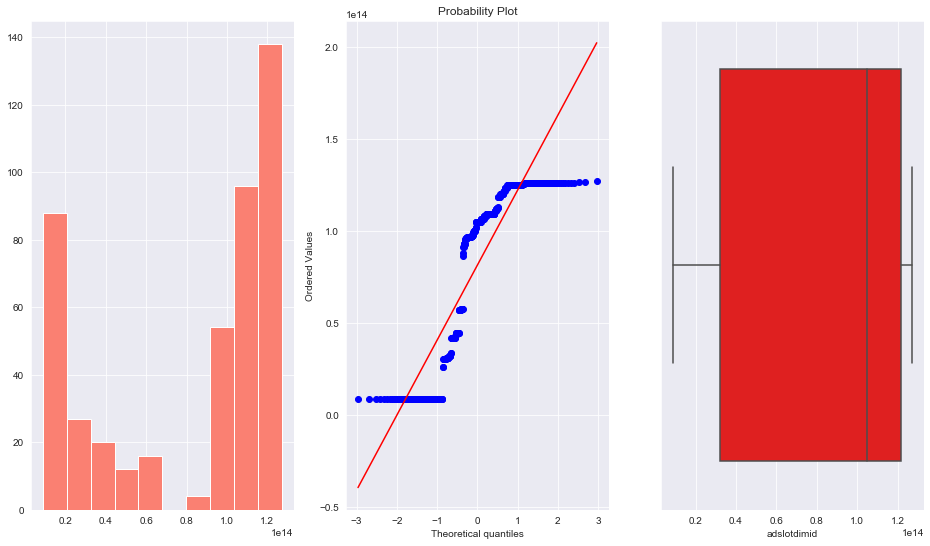

----------------------------------------------------------------------------------------------------
 Distribution for ispDimId is shown ↓


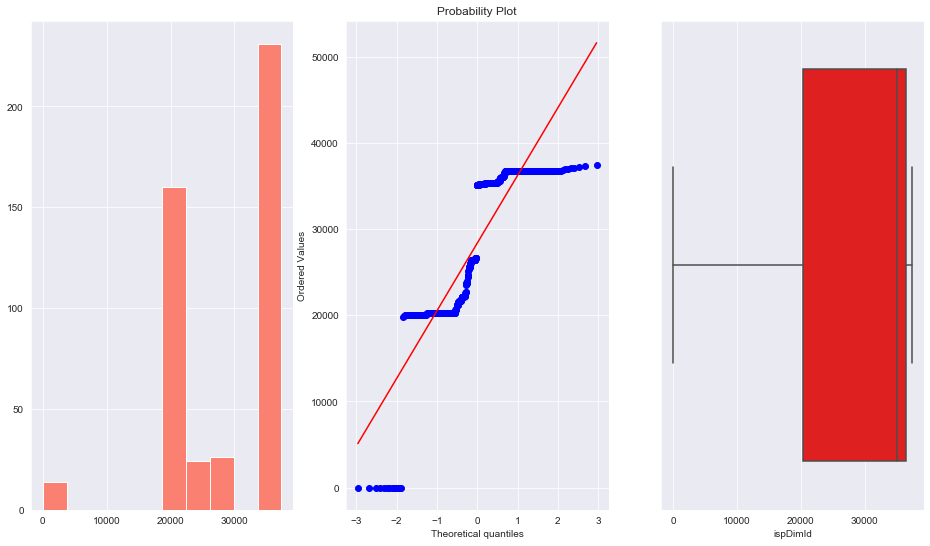

----------------------------------------------------------------------------------------------------
 Distribution for itmClmbLId is shown ↓


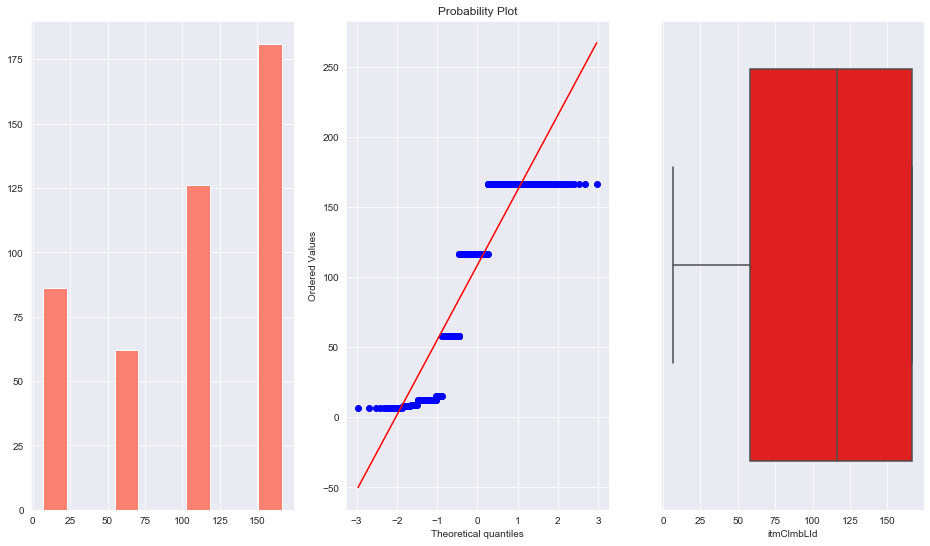

----------------------------------------------------------------------------------------------------


In [250]:
for i in boxcox_list:
    print(f' Distribution for {i} is shown ↓')
    plotboxcox(temp,i)
    print("-"*100)

In [251]:
# Removing outliers using IQR (Inter Quantile Range)

def quantile(df,val):
    a = []
    df_25 = df[val].quantile(0.25)
    df_75 = df[val].quantile(0.75)
    iqr = df_75-df_25
    upper_limit = float(df_75+(iqr*1.5))
    lower_limit = float(df_25-(iqr*1.5))
    
    for i in df[val]:
        if i>upper_limit:
            i = np.NaN
        
        elif i<lower_limit:
            i = np.NaN
            
        else:
            i = i
            
        a.append(i)
        
    return a

outlier_removal = ['clientid','pubclientid','siteId',
               'goalid','adslotdimid','ispDimId','itmClmbLId']

for i in outlier_removal:
    temp[i] = quantile(temp,i)
    

**Filling Outliers Directly as all the derivations were done in the training phase itself!**

In [252]:
temp['clientid'] = temp['clientid'].fillna(temp['clientid'].mean())
temp['goalid'] = temp['goalid'].fillna(temp['goalid'].mean())
temp.isnull().sum()

clientid        0
pubclientid     0
clmbuserid      0
imprid          0
siteId          0
goalid          0
cityId          0
stateId         0
countryDimId    0
browserId       0
adslotdimid     0
ispDimId        0
osVerDimId      0
clickIp         0
crtd            0
itmClmbLId      0
devTypeDimId    0
dtype: int64

In [253]:
temp = temp[['clientid', 'pubclientid', 'clmbuserid', 
             'imprid', 'siteId', 'cityId', 'stateId', 
             'adslotdimid', 'ispDimId', 'osVerDimId', 
             'itmClmbLId', 'devTypeDimId']
]
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,cityId,stateId,adslotdimid,ispDimId,osVerDimId,itmClmbLId,devTypeDimId
0,153.49,4.39,0,0,1.54,0,2442,"41,637,661,881,659.18","35,146.19",0,116.56,274
1,113.35,12.45,1,0,15.46,10278,1808,"126,268,044,827,966.45","36,750.17",199414,166.27,274
2,113.35,12.45,1,0,15.46,10278,1808,"126,268,044,827,966.45","36,750.17",199414,166.27,274
3,47.14,0.00,2,0,15.46,10239,1801,"125,175,846,486,745.95","36,750.17",360833,166.27,274
4,47.14,0.00,2,0,15.46,10239,1801,"125,175,846,486,745.95","36,750.17",360833,166.27,274


In [254]:
temp.shape

(455, 12)

In [255]:
test_scaled = mm.fit_transform(temp)

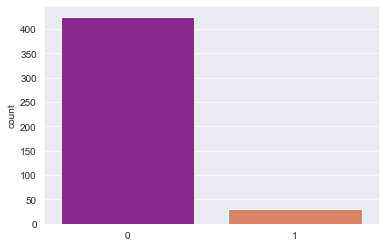

In [256]:
predictions = model.predict_classes(test_scaled)
sn.countplot(predictions,palette='plasma')

In [257]:
print(dict(Counter(predictions)))

{1: 30, 0: 425}


In [240]:
submission = pd.read_csv('finalsubmission.csv')
mapper = {1:True,0:False}

In [241]:
submission['conversion_fraud'] = predictions
submission.head()

,record_id,conversion_fraud
0,1000,1
1,1001,0
2,1002,0
3,1003,1
4,1004,1


In [242]:
submission['conversion_fraud'] = submission['conversion_fraud'].map(mapper)
submission.head()

,record_id,conversion_fraud
0,1000,True
1,1001,False
2,1002,False
3,1003,True
4,1004,True


In [243]:
submission.to_csv('ANNSUB.csv',index = False)

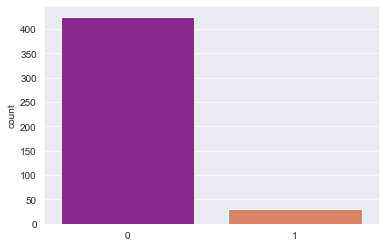

In [234]:
prediction = model.predict_proba(test_scaled)
com = []
for i in prediction[:,1]:
    if i>0.5:
        com.append(1)
    else:
        com.append(0)
        
sn.countplot(com,palette='plasma')

In [238]:
print(dict(Counter(com)))

{1: 30, 0: 425}


In [229]:
dt = DecisionTreeClassifier(ccp_alpha=0.012, criterion='entropy',
                       max_features='auto', min_samples_leaf=2,
                       min_samples_split=5)
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, criterion='entropy',
                       max_features='auto', min_samples_leaf=2,
                       min_samples_split=5)

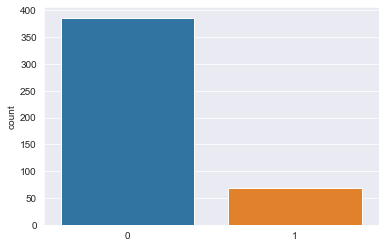

In [230]:
predictions = dt.predict(test_scaled)
sn.countplot(predictions)

In [231]:
print(dict(Counter(predictions)))

{1: 69, 0: 386}
